In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
zomato = pd.read_excel("D:/Datasets for Practice/Complete/Zomato Dataset/zomato_cleaned.xlsx")
zomato

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining_Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,...,Avg_Price_Restaurant,Avg_Rating_Cuisine,Avg_Price_Cuisine,Avg_Rating_City,Avg_Price_City,Is_Highly_Rated,Is_Expensive,diff,din_diff,Is_Popular
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,...,171.347826,3.818680,255.954894,3.939031,245.130482,1,0,0.000000,0.000000,True
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,...,171.347826,3.818680,255.954894,3.939031,245.130482,1,0,0.177736,-0.177736,True
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NONE,...,171.347826,3.818680,255.954894,3.939031,245.130482,1,0,0.000000,0.000000,True
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,...,171.347826,3.818680,255.954894,3.939031,245.130482,1,0,0.100000,-0.100000,True
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,...,171.347826,3.818680,255.954894,3.939031,245.130482,1,0,0.477736,-0.477736,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NONE,...,354.475524,3.885698,208.939511,3.880503,194.591645,1,1,NaN,NaN,False
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NONE,...,354.475524,3.885698,208.939511,3.880503,194.591645,1,1,NaN,NaN,False
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NONE,...,354.475524,3.885698,208.939511,3.880503,194.591645,1,1,NaN,NaN,False
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NONE,...,354.475524,3.885698,208.939511,3.880503,194.591645,1,1,NaN,NaN,False


In [3]:
zomato.columns

Index(['Restaurant_Name', 'Dining_Rating', 'Delivery_Rating', 'Dining_Votes',
       'Delivery_Votes', 'Cuisine', 'Place_Name', 'City', 'Item_Name',
       'Best_Seller', 'Votes', 'Prices', 'Average_Rating', 'Total_Votes',
       'Price_per_Vote', 'Log_Price', 'Is_Bestseller', 'Restaurant_Popularity',
       'Avg_Rating_Restaurant', 'Avg_Price_Restaurant', 'Avg_Rating_Cuisine',
       'Avg_Price_Cuisine', 'Avg_Rating_City', 'Avg_Price_City',
       'Is_Highly_Rated', 'Is_Expensive', 'diff', 'din_diff', 'Is_Popular'],
      dtype='object')

### Q1 : Plot the top 10 restaurants by Restaurant_Popularity.

In [4]:
zomato['Average_Rating'] = pd.to_numeric(zomato['Average_Rating'], errors='coerce')
zomato['Votes'] = pd.to_numeric(zomato['Votes'], errors='coerce').fillna(0)

In [5]:
top10_by_rp = zomato.groupby('Restaurant_Name')['Restaurant_Popularity'].sum().reset_index().sort_values(by='Restaurant_Popularity', ascending=False).head(10)

<Axes: xlabel='Restaurant_Popularity', ylabel='Restaurant_Name'>

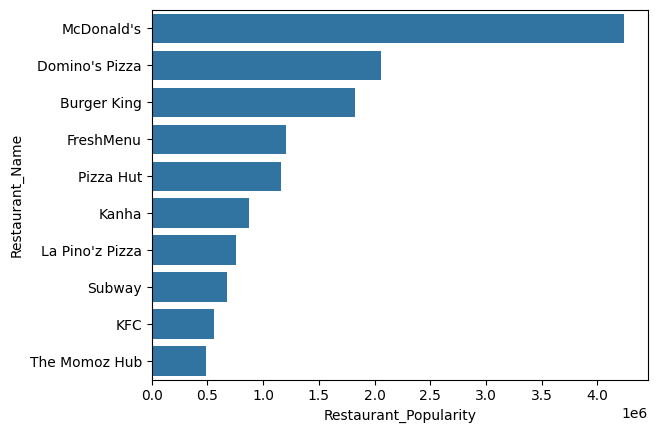

In [6]:
sns.barplot(data=top10_by_rp, x='Restaurant_Popularity', y='Restaurant_Name')

### Q2 : Plot the top 10 restaurants by Total_Votes.

<Axes: xlabel='Total_Votes', ylabel='Restaurant_Name'>

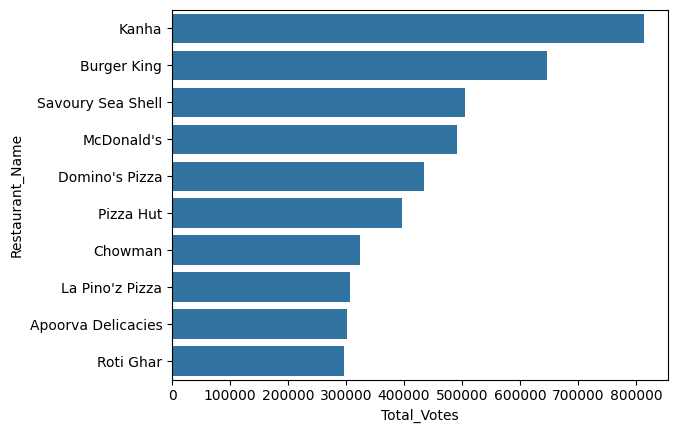

In [7]:
top10_by_tv = zomato.groupby('Restaurant_Name')['Total_Votes'].sum().reset_index().sort_values(by='Total_Votes', ascending=False).head(10)
sns.barplot(data=top10_by_tv, x='Total_Votes', y='Restaurant_Name')

### Q3 : Plot distribution of Average_Rating across all restaurants

<Axes: xlabel='Average_Rating', ylabel='Restaurant_Name'>

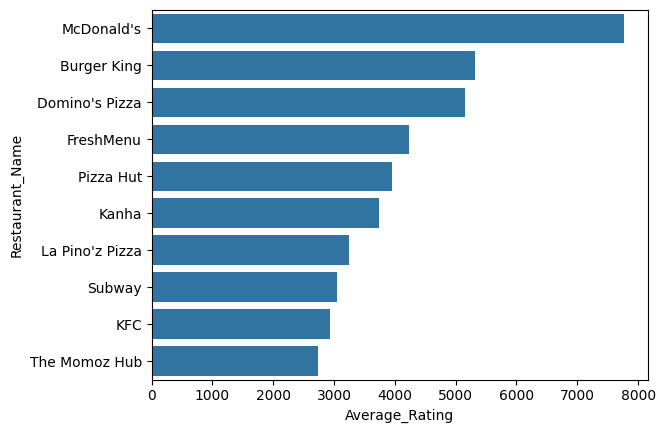

In [8]:
top10_by_ar = zomato.groupby('Restaurant_Name')['Average_Rating'].sum().reset_index().sort_values(by='Average_Rating', ascending=False).head(10)
sns.barplot(data=top10_by_ar, x='Average_Rating', y='Restaurant_Name')

### Q4 : Plot distribution of Dining_Rating vs Delivery_Rating (side-by-side).

<Axes: xlabel='Dining_Rating', ylabel='Density'>

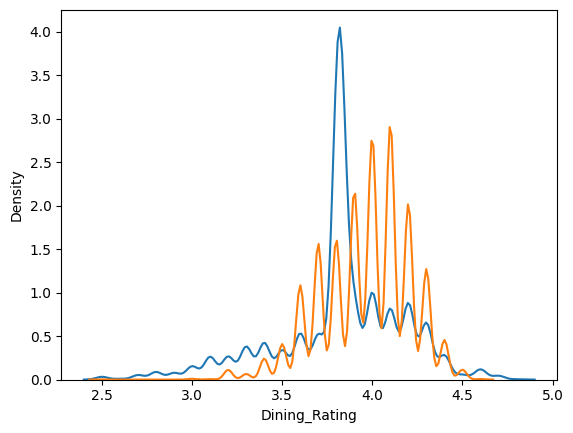

In [9]:
sns.kdeplot(zomato['Dining_Rating'], label='Dining')
sns.kdeplot(zomato['Delivery_Rating'], label='Delivery')

### Q5 :  Plot the difference between Dining_Rating and Delivery_Rating for restaurants.

In [10]:
zomato['rating_diff'] = zomato['Dining_Rating'] - zomato['Delivery_Rating']

<Axes: xlabel='rating_diff', ylabel='Count'>

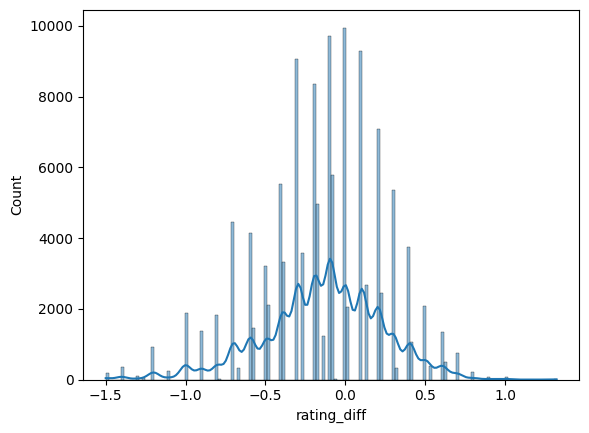

In [11]:
sns.histplot(zomato['rating_diff'], kde=True)

### Q6 : Plot count of restaurants that are Is_Highly_Rated vs not highly rated.

<Axes: xlabel='Is_Highly_Rated', ylabel='count'>

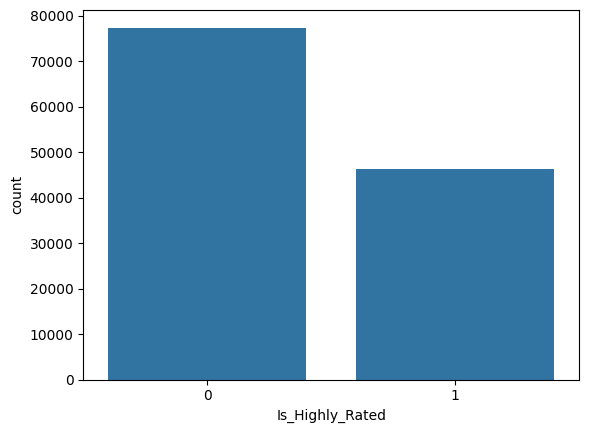

In [12]:
sns.countplot(data=zomato, x='Is_Highly_Rated')

### Q7 : Plot average restaurant rating by City.

<Axes: xlabel='Avg_Rating_Restaurant', ylabel='City'>

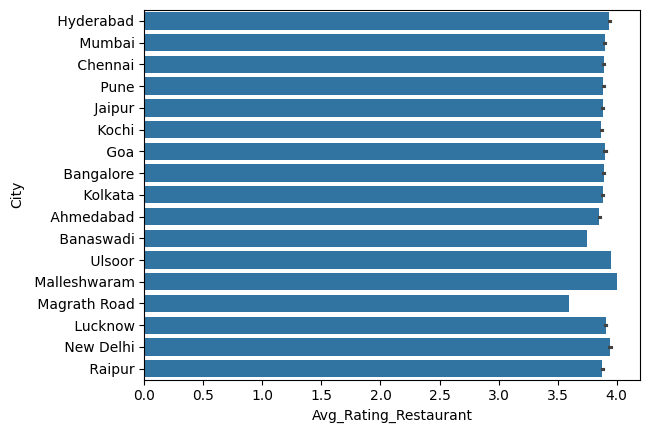

In [13]:
sns.barplot(data=zomato, x='Avg_Rating_Restaurant', y='City', estimator='mean')

### Q8 : Plot average price (Avg_Price_City) by City.

<Axes: xlabel='Avg_Price_City', ylabel='City'>

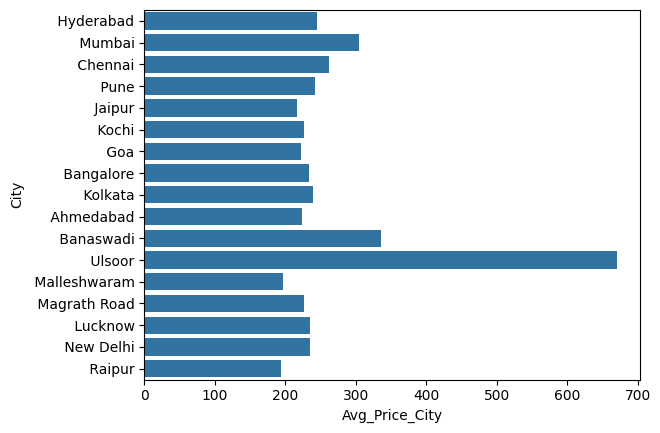

In [14]:
sns.barplot(data=zomato, x='Avg_Price_City', y='City', estimator='mean')

### Q9 : Plot total votes by City.

<Axes: xlabel='Total_Votes', ylabel='City'>

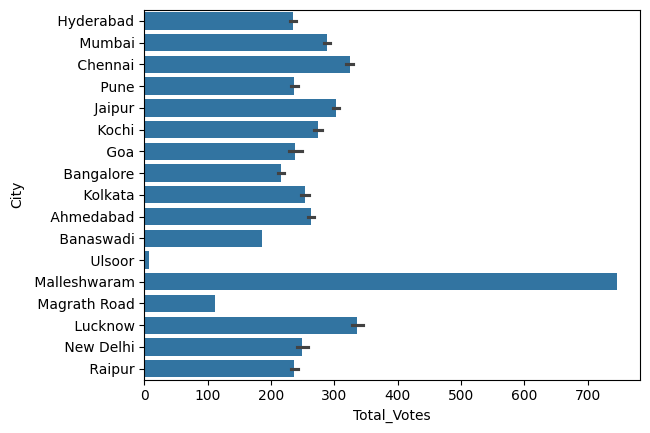

In [15]:
sns.barplot(data=zomato, y='City', x='Total_Votes')

### Q10 : Plot number of restaurants per City.

<Axes: xlabel='count', ylabel='City'>

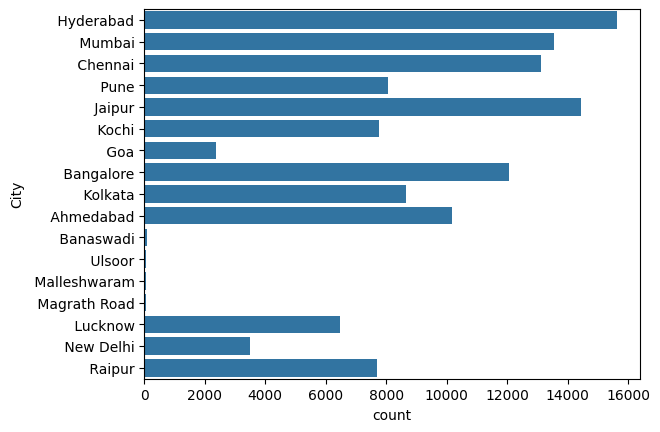

In [16]:
sns.countplot(data=zomato, y='City')

### Q11 : Plot top 10 Place_Name localities by restaurant count within a city.

<Axes: xlabel='Count', ylabel='Place_Name'>

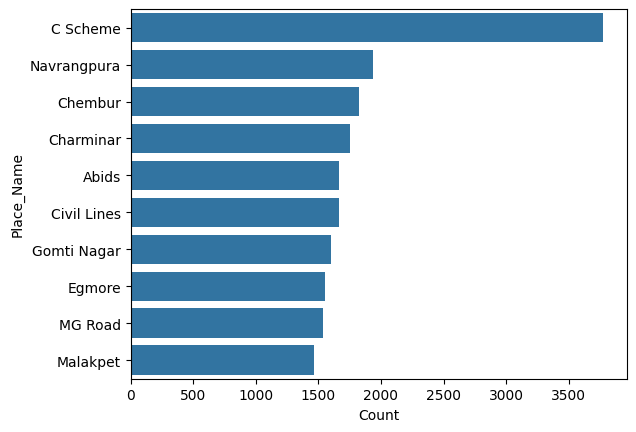

In [17]:
top_places = zomato['Place_Name'].value_counts().head(10).reset_index()
top_places.columns = ['Place_Name', 'Count']
sns.barplot(data=top_places, x='Count', y='Place_Name')

### Q12 : Plot average rating by Place_Name (top localities only).

<Axes: xlabel='Average_Rating', ylabel='Place_Name'>

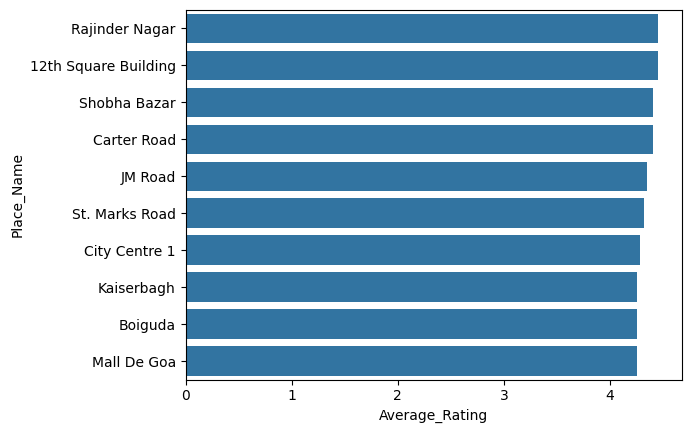

In [18]:
top10_by_ar = zomato.groupby('Place_Name')['Average_Rating'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(data=top10_by_ar, x='Average_Rating', y='Place_Name')

### Q13 : Plot popularity distribution across localities within a city.

<Axes: xlabel='Restaurant_Popularity', ylabel='City'>

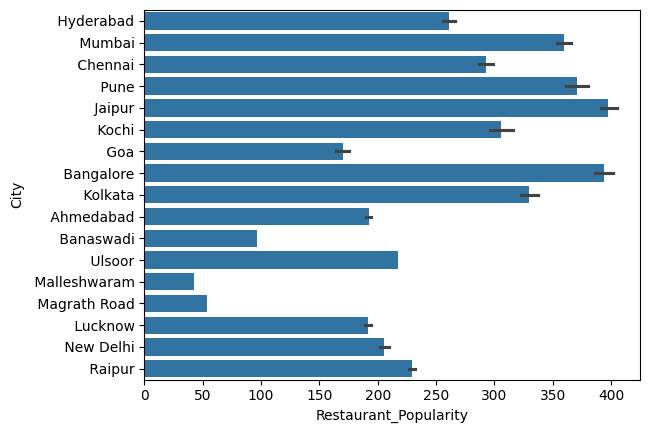

In [19]:
sns.barplot(data=zomato, x='Restaurant_Popularity', y='City')

### Q14 : Plot relationship between Average_Rating and Price_per_Vote.

<Axes: xlabel='Average_Rating', ylabel='Price_per_Vote'>

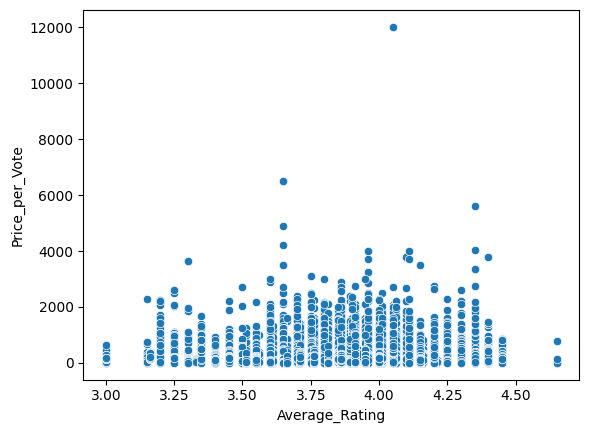

In [20]:
sns.scatterplot(data=zomato, x='Average_Rating', y='Price_per_Vote')

### Q15 : Plot average rating vs average price (scatter) to identify value clusters.

<Axes: xlabel='Average_Rating', ylabel='Avg_Price_City'>

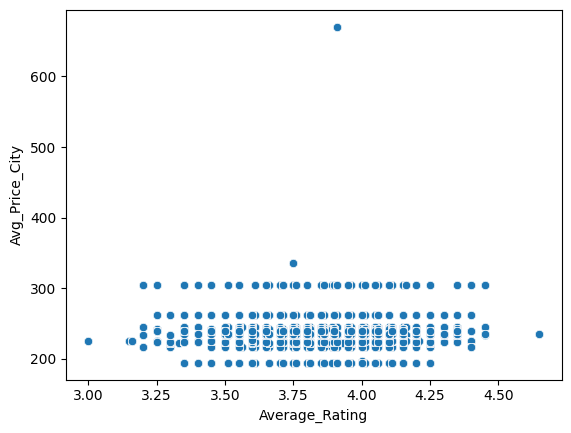

In [21]:
sns.scatterplot(data=zomato, x='Average_Rating', y='Avg_Price_City')

### Q16 : Plot prices of BESTSELLER items vs non-bestseller items.

<Axes: xlabel='Prices', ylabel='Best_Seller'>

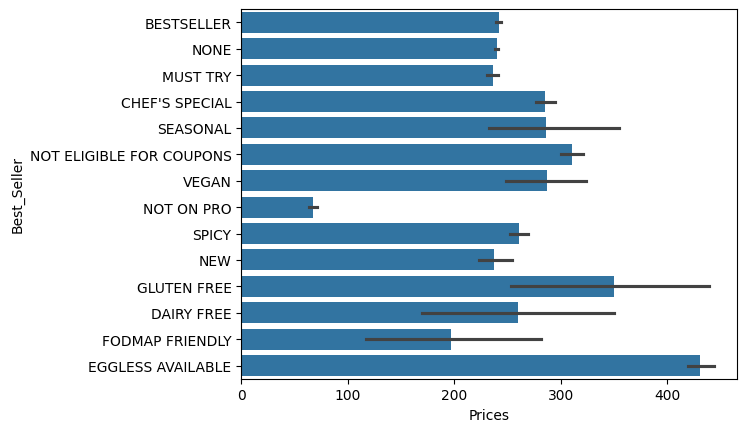

In [22]:
sns.barplot(data=zomato, y='Best_Seller', x='Prices')

### Q17 : Plot votes distribution for BESTSELLER vs non-bestseller items.

<Axes: xlabel='Total_Votes', ylabel='Best_Seller'>

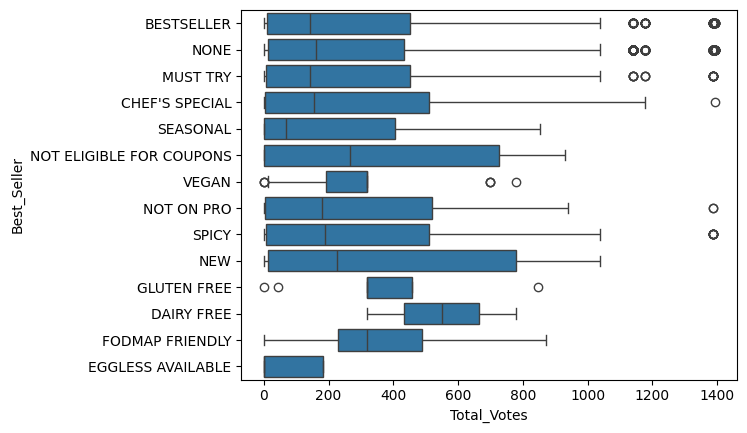

In [23]:
sns.boxplot(data=zomato, y='Best_Seller', x='Total_Votes')

### Q18 : Plot average price by bestseller flag (BESTSELLER).

<Axes: xlabel='Prices', ylabel='Best_Seller'>

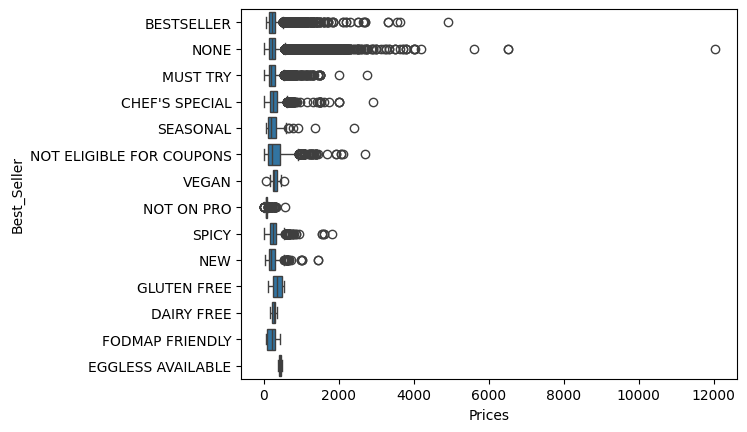

In [27]:
sns.boxplot(data=zomato, y='Best_Seller', x='Prices')

### Q19 : Plot top 10 cuisines by total Total_Votes.

<Axes: xlabel='Total_Votes', ylabel='Cuisine'>

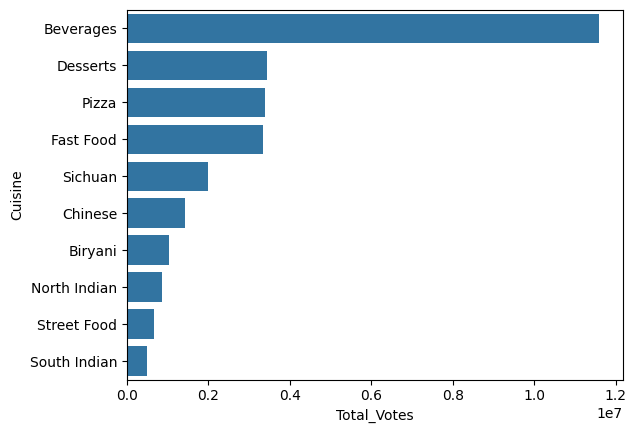

In [28]:
top10_cuisines = zomato.groupby('Cuisine')['Total_Votes'].sum().reset_index().sort_values(by='Total_Votes', ascending=False).head(10)
sns.barplot(data=top10_cuisines, x='Total_Votes', y='Cuisine')

### Q20 : Plot top 10 cuisines by Avg_Rating_Cuisine.

<Axes: xlabel='Average_Rating', ylabel='Cuisine'>

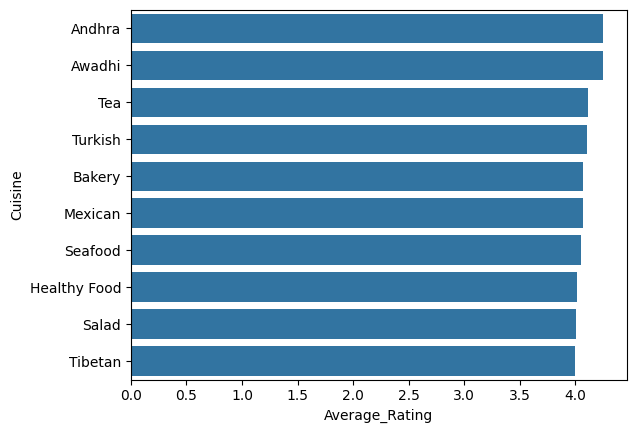

In [29]:
top10_cuisines_by_ar = zomato.groupby('Cuisine')['Average_Rating'].mean().reset_index().sort_values(by='Average_Rating', ascending=False).head(10)
sns.barplot(data=top10_cuisines_by_ar, x='Average_Rating', y='Cuisine')

### Q21 : Plot average price by Cuisine.

<Axes: xlabel='Avg_Price_Cuisine', ylabel='Cuisine'>

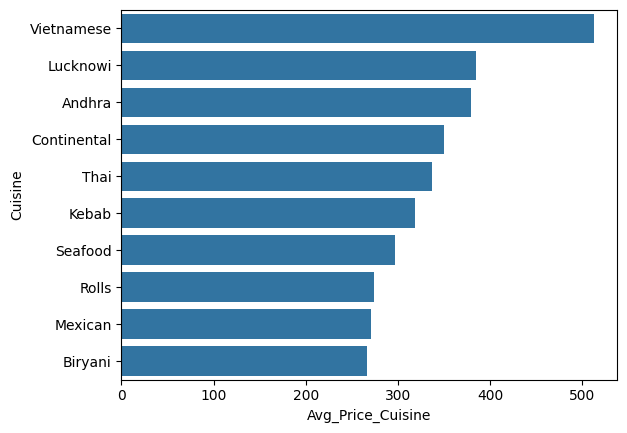

In [30]:
top10_cuisines_by_ap = zomato.groupby('Cuisine')['Avg_Price_Cuisine'].mean().reset_index().sort_values(by='Avg_Price_Cuisine', ascending=False).head(10)
sns.barplot(data=top10_cuisines_by_ap, x='Avg_Price_Cuisine', y='Cuisine')

### Q22 : Plot cuisine count distribution (number of restaurants per cuisine).

<Axes: xlabel='count', ylabel='Cuisine'>

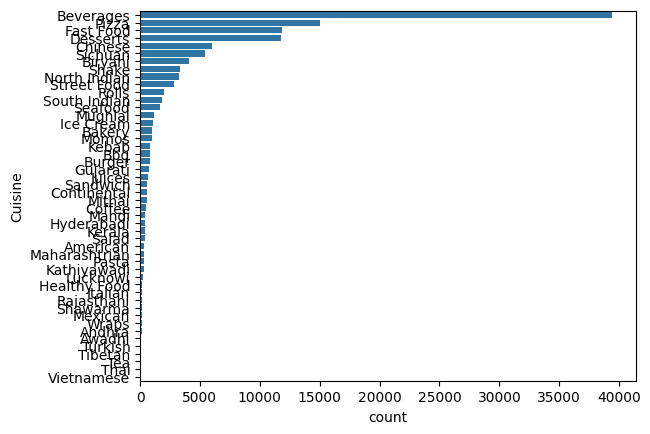

In [37]:
sns.countplot(data=zomato, y='Cuisine', order=zomato['Cuisine'].value_counts().index)

### Q23 : Plot rating distribution across cuisines (boxplot).

<Axes: xlabel='Average_Rating', ylabel='Cuisine'>

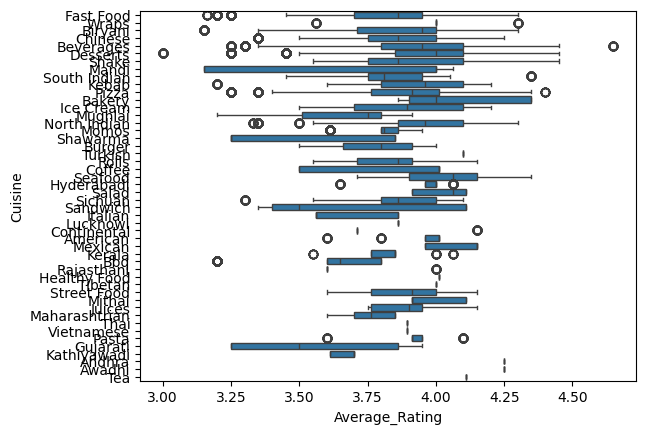

In [39]:
sns.boxplot(data=zomato, y='Cuisine', x='Average_Rating')

### Q24 : Plot price distribution across cuisines (boxplot).

<Axes: xlabel='Prices', ylabel='Cuisine'>

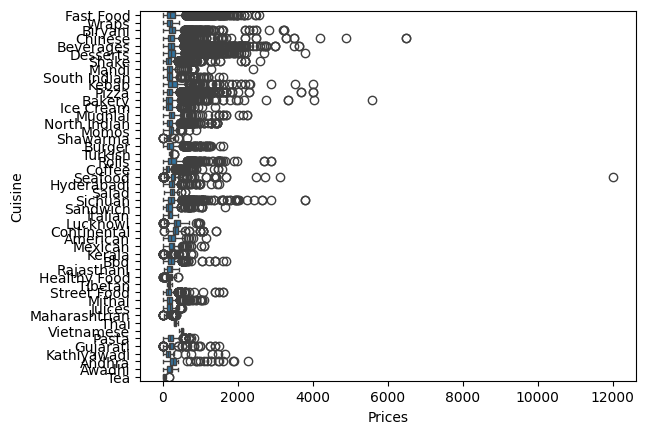

In [40]:
sns.boxplot(data=zomato, y='Cuisine', x='Prices')

### Q25 : Plot relationship between Prices and Total_Votes (scatter).

<Axes: xlabel='Prices', ylabel='Total_Votes'>

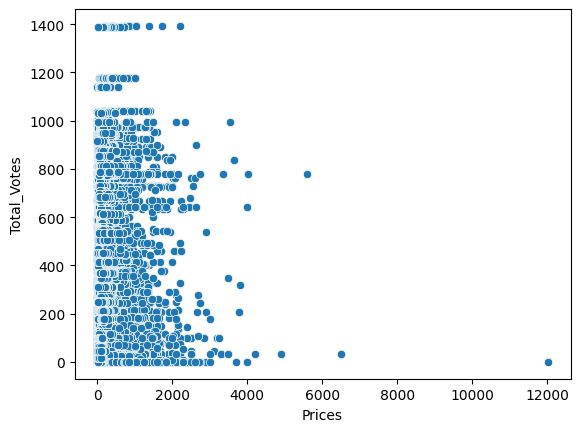

In [41]:
sns.scatterplot(data=zomato, x='Prices', y='Total_Votes')

### Q26 : Plot relationship between Prices and Average_Rating.

<Axes: xlabel='Prices', ylabel='Average_Rating'>

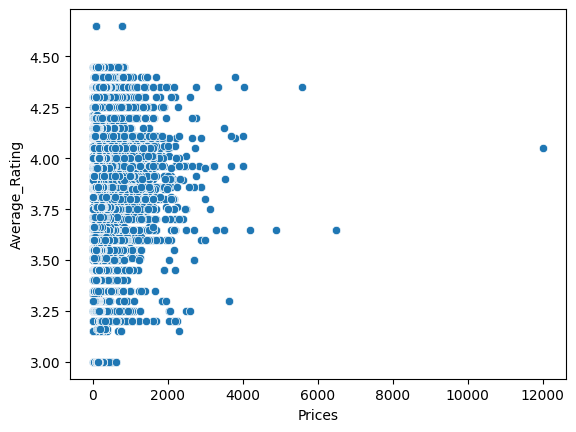

In [42]:
sns.scatterplot(data=zomato, x='Prices', y='Average_Rating')

### Q27 : Plot count of restaurants flagged as Is_Expensive.

<Axes: xlabel='Is_Expensive', ylabel='count'>

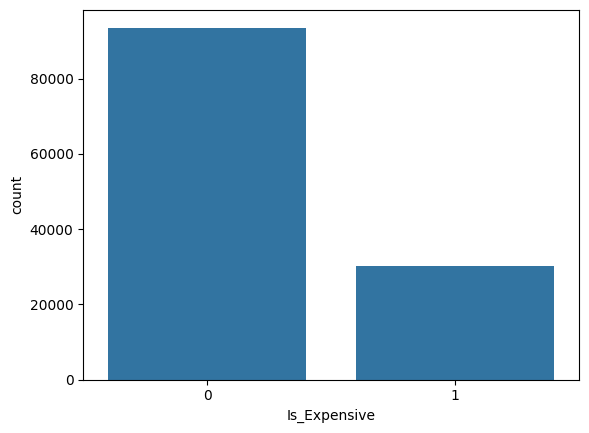

In [43]:
sns.countplot(data=zomato, x='Is_Expensive')

### Q28 : Plot average rating of Is_Expensive vs non-expensive restaurants.

<Axes: xlabel='Is_Expensive', ylabel='Average_Rating'>

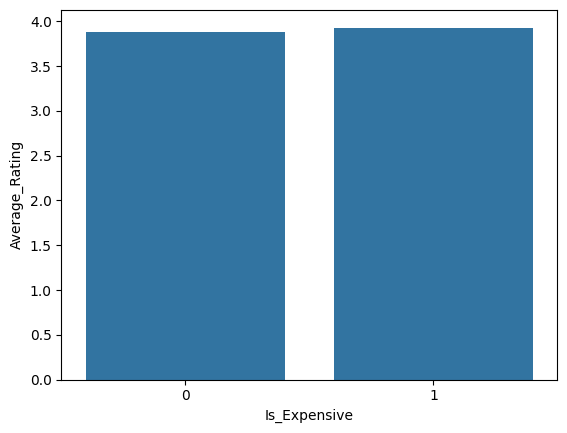

In [46]:
sns.barplot(data=zomato, y='Average_Rating', x='Is_Expensive', estimator='mean')

### Q29 : Plot price distribution for expensive vs non-expensive restaurants.

<Axes: xlabel='Is_Expensive', ylabel='Prices'>

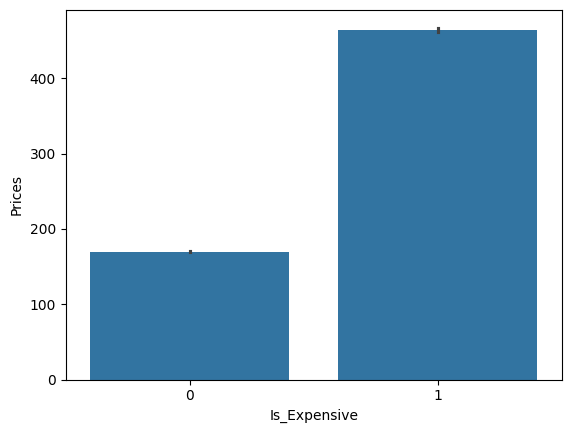

In [47]:
sns.barplot(data=zomato, y='Prices', x='Is_Expensive', estimator='mean')

### Q30 : Plot popularity score vs average rating.

<Axes: xlabel='Restaurant_Popularity', ylabel='Average_Rating'>

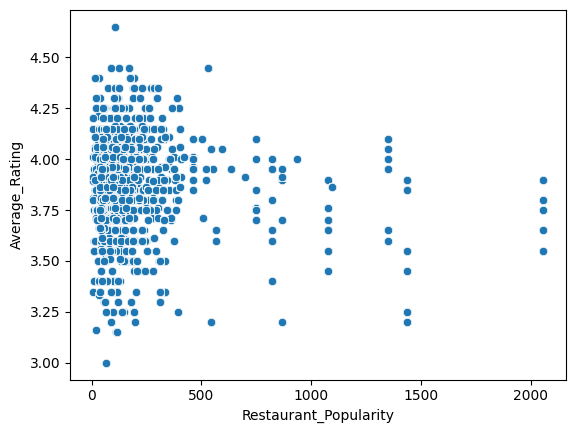

In [48]:
sns.scatterplot(data=zomato, x='Restaurant_Popularity', y='Average_Rating')

### Q31 : Plot popularity score vs price.

<Axes: xlabel='Restaurant_Popularity', ylabel='Prices'>

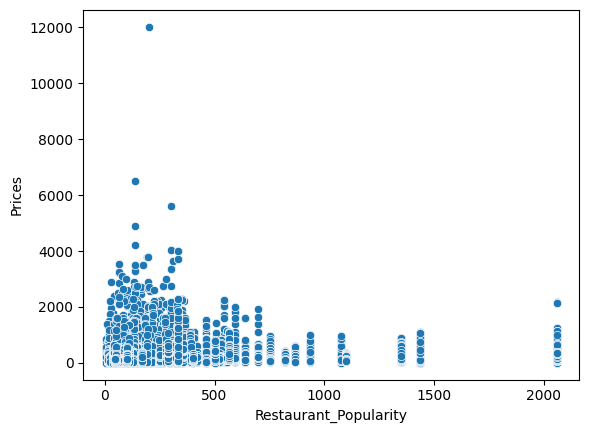

In [49]:
sns.scatterplot(data=zomato, x='Restaurant_Popularity', y='Prices')

### Q32 : Plot city-wise distribution of highly rated restaurants ('Is_Highly_Rated').

<Axes: xlabel='count', ylabel='City'>

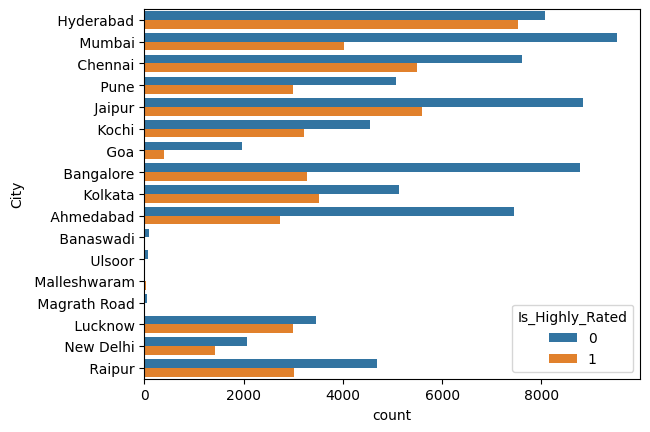

In [58]:
sns.countplot(data=zomato, hue='Is_Highly_Rated', y='City')

### Q33 : Plot cuisine-wise distribution of highly rated restaurants.

<Axes: xlabel='count', ylabel='Cuisine'>

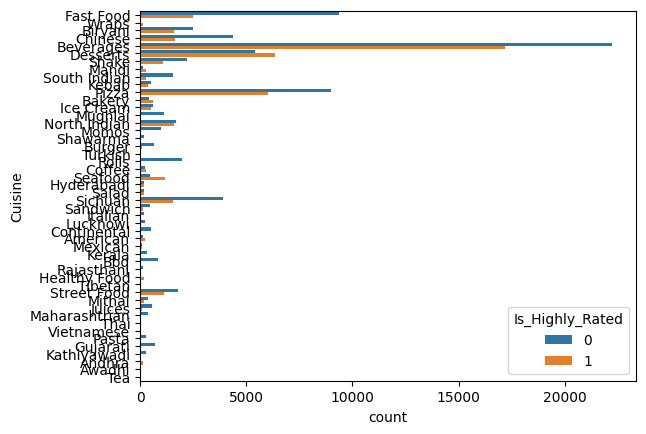

In [59]:
sns.countplot(data=zomato, hue='Is_Highly_Rated', y='Cuisine')

### Q34 : Plot votes vs ratings colored by city (multi-city comparison).

<Axes: xlabel='Total_Votes', ylabel='Average_Rating'>

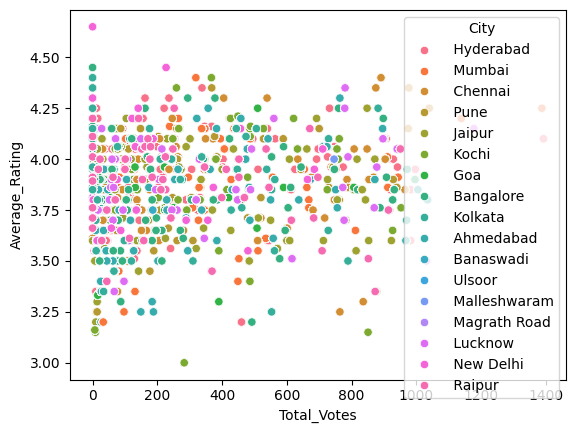

In [61]:
sns.scatterplot(data=zomato, x='Total_Votes',
                y='Average_Rating', hue='City')

### Q35 : Plot votes vs ratings colored by cuisine (multi-cuisine comparison).

<Axes: xlabel='Total_Votes', ylabel='Average_Rating'>

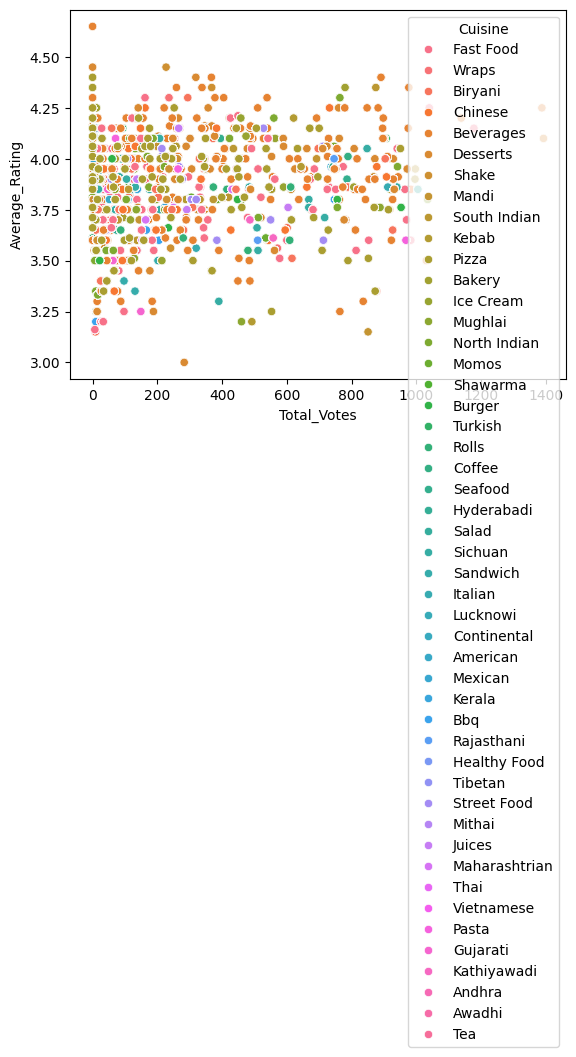

In [62]:
sns.scatterplot(data=zomato, x='Total_Votes',
                y='Average_Rating', hue='Cuisine')

### Q38 : Plot correlation heatmap of numeric variables (ratings, prices, votes, popularity).

<Axes: >

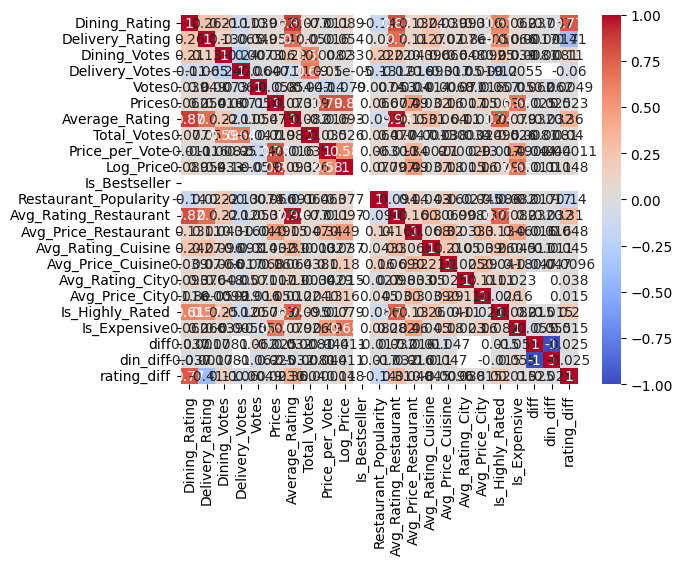

In [72]:
sns.heatmap(zomato.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

### Q41 : Plot comparison of dining vs delivery ratings for top 20 restaurants.

In [84]:
top20 = zomato.groupby('Restaurant_Name')['Total_Votes'].sum().sort_values(ascending=False).head(20).index
top20

Index(['Kanha', 'Burger King', 'Savoury Sea Shell', 'McDonald's',
       'Domino's Pizza', 'Pizza Hut', 'Chowman', 'La Pino'z Pizza',
       'Apoorva Delicacies', 'Roti Ghar', 'KFC', 'Neelkanth Sweets',
       'Annamaya', 'Anju Sweets', 'KMS Hakkim Kalyana Biriyani', 'FreshMenu',
       'Hotel Paramount', 'Madhurima Veg', 'Subway', 'The Hazelnut Factory'],
      dtype='object', name='Restaurant_Name')

In [86]:
top20_df = zomato[zomato['Restaurant_Name'].isin(top20)]

<Axes: xlabel='Rating', ylabel='Restaurant_Name'>

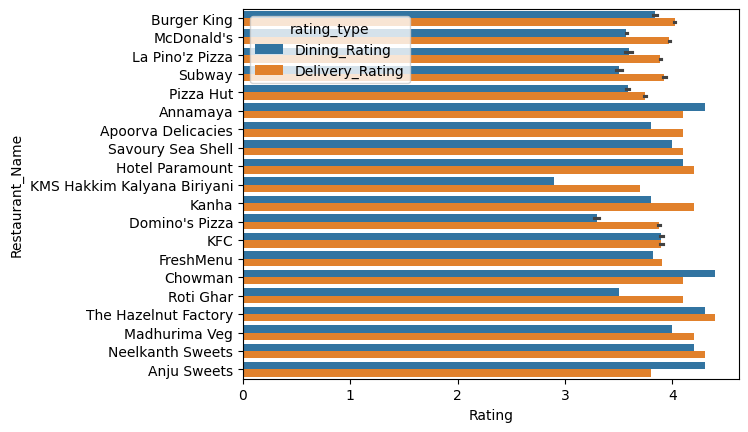

In [89]:
sns.barplot(data=top20_df.melt(id_vars = 'Restaurant_Name',
                            value_vars = ['Dining_Rating', 'Delivery_Rating'],
                           var_name = 'rating_type', 
                           value_name='Rating'),
            y='Restaurant_Name', x='Rating', hue='rating_type', estimator='mean')

### Q42 : Plot variance between dining and delivery ratings by cuisine.

<Axes: xlabel='dining_diff', ylabel='Cuisine'>

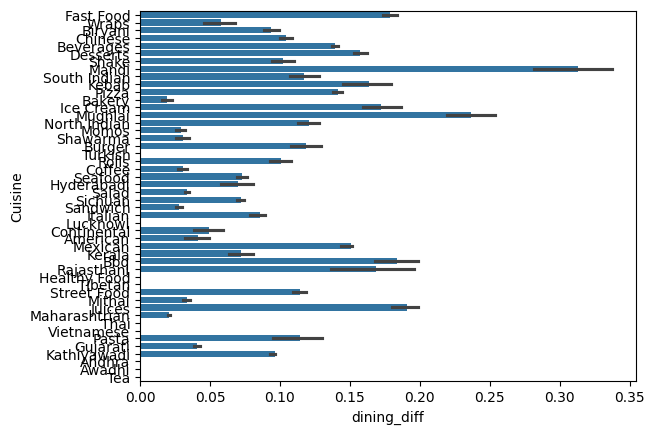

In [91]:
zomato['dining_diff'] = zomato['Dining_Rating'] - zomato['Delivery_Rating']
sns.barplot(data=zomato, x='dining_diff', y='Cuisine', estimator='var')

### Q43 : Plot restaurant density by city (count-based bar plot).

In [95]:
zomato['Restaurant_City'] = (zomato['Restaurant_Name'] + '|' + zomato['City'])

In [96]:
city_density = (
    zomato[['City', 'Restaurant_City']]
    .drop_duplicates()
    .groupby('City')
    .size()
    .reset_index(name='Restaurant_Count')
)

<Axes: xlabel='Restaurant_Count', ylabel='City'>

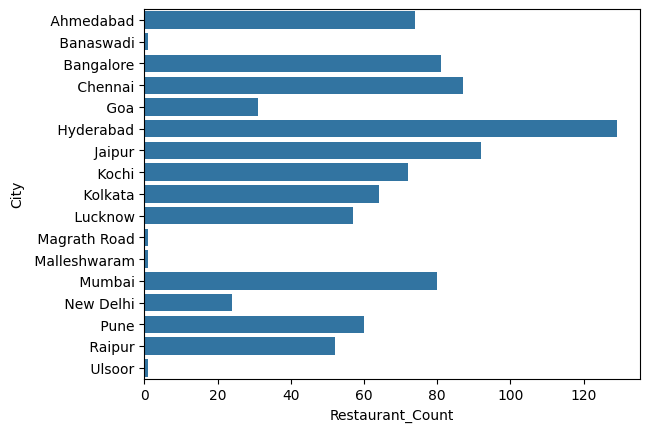

In [98]:
sns.barplot(
    data=city_density,
    y='City',
    x='Restaurant_Count'
)

### Q44 : Plot average votes per restaurant by city.

<Axes: xlabel='Total_Votes', ylabel='City'>

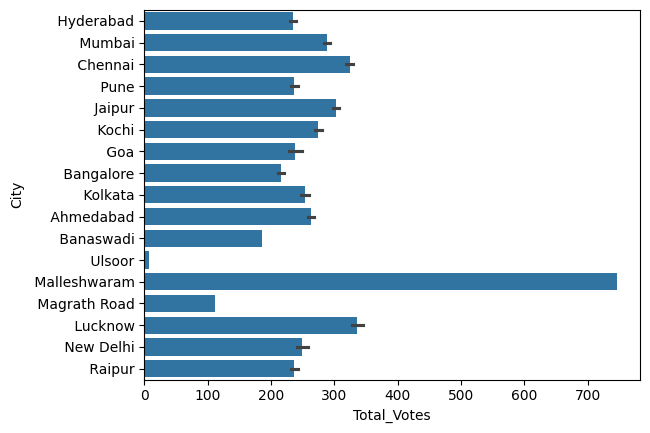

In [100]:
sns.barplot(data=zomato, y='City',
            x='Total_Votes', 
            estimator='mean')

### Q45 : Plot average votes per restaurant by cuisine.

<Axes: xlabel='Total_Votes', ylabel='Cuisine'>

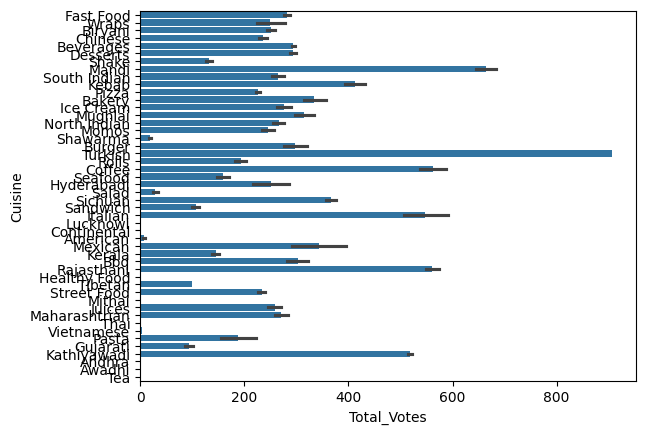

In [101]:
sns.barplot(data=zomato, y='Cuisine',
            x='Total_Votes', 
            estimator='mean')

### Q46 : Plot a final “business summary” chart showing top cities by popularity, ratings, and pricing side-by-side.

In [102]:
gist = zomato.groupby('City').agg({
    'Restaurant_Popularity':'sum',
    'Average_Rating':'mean',
    'Avg_Price_City':'mean'
}).reset_index()

In [103]:
gist_melted = gist.melt(id_vars='City')

<Axes: xlabel='value', ylabel='City'>

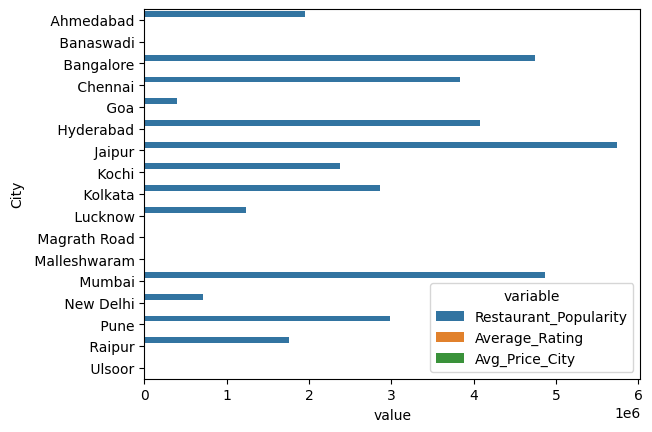

In [105]:
sns.barplot(
    data=gist_melted,
    y='City',
    x='value',
    hue='variable'
)